#**Modelado del mundo real: Estadística con python empresa de zapatillas**
La gestión de los inventarios en las zapatillas, ya que, en la venta de zapatillas existe muchas tallas y no siempre se puede tener organizada las zapatillas.

##**Problema**
Calcular la cantidad máxima de zapatillas que se venderán en base a nuestras ventas que se han realizado los años anteriores.

##**Objetivo**
Analizar la demanda de cada talla de zapatillas.

##**Información del dataset**
La empresa tiene un dataset que contiene las ventas de zapatillas de los años 2014, 2015 y 2016.

**Columnas**
-   InvoceNo: Número de la factura de la zapatilla.
-   Date: Fecha de venta de la zapatilla.
-   Country: País de la venta de la zapatilla.
-   ProductId: Id de la zapatilla.
-   Shop: Código de la tienda donde se vende la zapatilla.
-   Gender: Zapatilla para el genero.
-   Size(us): Talla de la zapatilla Estados Unidos.
-   Size(Europe): talla de la zapatilla Europa.
-   Size(UK): Talla de la zapatilla reino unido.
-   UnitPice: Precio de la zapatilla.
-   Discount: Descuento de la zapatilla en porcentaje.
-   SalePrice: Precio de venta de la zapatilla.


## Importamos las librerias

In [1]:
#Procesamiento
import math
import pandas as pd

#Visualización
import seaborn as sns
import matplotlib.pyplot as plt

##Cargamos el data set.

In [2]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [3]:
ruta = '/content/drive/MyDrive/EjerciciosLimpiezaDatos/shoes_dataset.csv'
dataShoes = pd.read_csv(ruta)
dataShoes

,InvoiceNo,Date,Country,ProductID,Shop,Gender,Size (US),Size (Europe),Size (UK),UnitPrice,Discount,SalePrice
0,52389,1/1/2014,United Kingdom,2152,UK2,Male,11.0,44,10.5,$159.00,0%,$159.00
1,52390,1/1/2014,United States,2230,US15,Male,11.5,44-45,11.0,$199.00,20%,$159.20
2,52391,1/1/2014,Canada,2160,CAN7,Male,9.5,42-43,9.0,$149.00,20%,$119.20
3,52392,1/1/2014,United States,2234,US6,Female,9.5,40,7.5,$159.00,0%,$159.00
4,52393,1/1/2014,United Kingdom,2222,UK4,Female,9.0,39-40,7.0,$159.00,0%,$159.00
...,...,...,...,...,...,...,...,...,...,...,...,...
14962,65773,12/31/2016,United Kingdom,2154,UK2,Male,9.5,42-43,9.0,$139.00,0%,$139.00
14963,65774,12/31/2016,United States,2181,US12,Female,12.0,42-43,10.0,$149.00,0%,$149.00
14964,65775,12/31/2016,Canada,2203,CAN6,Male,10.5,43-44,10.0,$179.00,30%,$125.30
14965,65776,12/31/2016,Germany,2231,GER1,Female,9.5,40,7.5,$199.00,0%,$199.00


## Análisis exploratorio de datos

### General

Tamaño del data frame

In [4]:
dataShoes.shape

(14967, 12)

In [5]:
dataShoes.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 14967 entries, 0 to 14966
Data columns (total 12 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   InvoiceNo      14967 non-null  int64  
 1   Date           14967 non-null  object 
 2   Country        14967 non-null  object 
 3   ProductID      14967 non-null  int64  
 4   Shop           14967 non-null  object 
 5   Gender         14967 non-null  object 
 6   Size (US)      14967 non-null  float64
 7   Size (Europe)  14967 non-null  object 
 8   Size (UK)      14967 non-null  float64
 9   UnitPrice      14967 non-null  object 
 10  Discount       14967 non-null  object 
 11  SalePrice      14967 non-null  object 
dtypes: float64(2), int64(2), object(8)
memory usage: 1.4+ MB


-   No tenemos datos nulos.
-   El tipo de datos de las columnas InvoceNo y ProductId es Entero.
-   El tipo de datos de las columnas Date, Country, Shop, Gender, Size(Europa), UnitPrice, Discount, SalesPrice son Object.
-   El tipo de datos de las columnas Size(US) y Size(UK) es Float.


### Númericas
Descripción de variables númericas:

In [6]:
dataShoes.describe()

,InvoiceNo,ProductID,Size (US),Size (UK)
count,14967.000000,14967.000000,14967.000000,14967.000000
mean,59050.261509,2195.325115,9.195630,8.089497
std,3889.598714,27.633526,1.511719,1.970014
min,52389.000000,2147.000000,4.500000,2.500000
25%,55648.500000,2172.000000,8.000000,6.500000
50%,59092.000000,2195.000000,9.000000,8.500000
75%,62433.000000,2219.000000,10.000000,9.500000
max,65777.000000,2242.000000,15.000000,14.500000


In [7]:
dataShoes.describe().T

,count,mean,std,min,25%,50%,75%,max
InvoiceNo,14967.0,59050.261509,3889.598714,52389.0,55648.5,59092.0,62433.0,65777.0
ProductID,14967.0,2195.325115,27.633526,2147.0,2172.0,2195.0,2219.0,2242.0
Size (US),14967.0,9.195630,1.511719,4.5,8.0,9.0,10.0,15.0
Size (UK),14967.0,8.089497,1.970014,2.5,6.5,8.5,9.5,14.5


### Descriptivas
Descripción de variables categóricas:

In [9]:
dataShoes.describe(include='O')

,Date,Country,Shop,Gender,Size (Europe),UnitPrice,Discount,SalePrice
count,14967,14967,14967,14967,14967,14967,14967,14967
unique,1096,4,29,2,24,8,5,40
top,10/18/2016,United States,GER2,Male,42-43,$199.00,0%,$199.00
freq,35,5886,1947,8919,1968,1998,8295,1143


##**Limpieza de los datos.**

Si queremos agrupar por año, por mes, las ventas de las zapatillas se deberíamos de separar en otras columnas la columna Date.

In [10]:
dataShoes['Date'] = pd.to_datetime(dataShoes['Date'])
dataShoes.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 14967 entries, 0 to 14966
Data columns (total 12 columns):
 #   Column         Non-Null Count  Dtype         
---  ------         --------------  -----         
 0   InvoiceNo      14967 non-null  int64         
 1   Date           14967 non-null  datetime64[ns]
 2   Country        14967 non-null  object        
 3   ProductID      14967 non-null  int64         
 4   Shop           14967 non-null  object        
 5   Gender         14967 non-null  object        
 6   Size (US)      14967 non-null  float64       
 7   Size (Europe)  14967 non-null  object        
 8   Size (UK)      14967 non-null  float64       
 9   UnitPrice      14967 non-null  object        
 10  Discount       14967 non-null  object        
 11  SalePrice      14967 non-null  object        
dtypes: datetime64[ns](1), float64(2), int64(2), object(7)
memory usage: 1.4+ MB


In [12]:
dataShoes['Year'] = dataShoes['Date'].dt.year
dataShoes['Day'] = dataShoes['Date'].dt.day
dataShoes['Month'] = dataShoes['Date'].dt.month
dataShoes.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 14967 entries, 0 to 14966
Data columns (total 15 columns):
 #   Column         Non-Null Count  Dtype         
---  ------         --------------  -----         
 0   InvoiceNo      14967 non-null  int64         
 1   Date           14967 non-null  datetime64[ns]
 2   Country        14967 non-null  object        
 3   ProductID      14967 non-null  int64         
 4   Shop           14967 non-null  object        
 5   Gender         14967 non-null  object        
 6   Size (US)      14967 non-null  float64       
 7   Size (Europe)  14967 non-null  object        
 8   Size (UK)      14967 non-null  float64       
 9   UnitPrice      14967 non-null  object        
 10  Discount       14967 non-null  object        
 11  SalePrice      14967 non-null  object        
 12  Year           14967 non-null  int64         
 13  Day            14967 non-null  int64         
 14  Month          14967 non-null  int64         
dtypes: datetime64[ns](1

Las columnas UnitPrice y SalePrice estan con el signo dolar esto no nos permite hacer calculos, para esto las convertimos a punto flotante.

In [ ]:
dataShoes['SalePrice'] = dataShoes['SalePrice'].apply(lambda x: float(x[2:]))
dataShoes['UnitPrice'] = dataShoes['UnitPrice'].apply(lambda x: float(x[2:]))

In [18]:
dataShoes.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 14967 entries, 0 to 14966
Data columns (total 15 columns):
 #   Column         Non-Null Count  Dtype         
---  ------         --------------  -----         
 0   InvoiceNo      14967 non-null  int64         
 1   Date           14967 non-null  datetime64[ns]
 2   Country        14967 non-null  object        
 3   ProductID      14967 non-null  int64         
 4   Shop           14967 non-null  object        
 5   Gender         14967 non-null  object        
 6   Size (US)      14967 non-null  float64       
 7   Size (Europe)  14967 non-null  object        
 8   Size (UK)      14967 non-null  float64       
 9   UnitPrice      14967 non-null  float64       
 10  Discount       14967 non-null  object        
 11  SalePrice      14967 non-null  float64       
 12  Year           14967 non-null  int64         
 13  Day            14967 non-null  int64         
 14  Month          14967 non-null  int64         
dtypes: datetime64[ns](1

In [19]:
dataShoes.describe()

,InvoiceNo,ProductID,Size (US),Size (UK),UnitPrice,SalePrice,Year,Day,Month
count,14967.000000,14967.000000,14967.000000,14967.000000,14967.000000,14967.000000,14967.000000,14967.000000,14967.000000
mean,59050.261509,2195.325115,9.195630,8.089497,164.171377,143.987913,2015.308211,15.745306,6.689517
std,3889.598714,27.633526,1.511719,1.970014,22.940544,35.180799,0.762320,8.719764,3.319909
min,52389.000000,2147.000000,4.500000,2.500000,129.000000,64.500000,2014.000000,1.000000,1.000000
25%,55648.500000,2172.000000,8.000000,6.500000,149.000000,125.100000,2015.000000,8.000000,4.000000
50%,59092.000000,2195.000000,9.000000,8.500000,159.000000,149.000000,2015.000000,16.000000,7.000000
75%,62433.000000,2219.000000,10.000000,9.500000,179.000000,169.000000,2016.000000,23.000000,10.000000
max,65777.000000,2242.000000,15.000000,14.500000,199.000000,199.000000,2016.000000,31.000000,12.000000


##Análisis de los datos
Seleccionamos las variables categóricas y numéricas

In [20]:
dataShoes['Discount'].unique()

array(['0%', '20%', '10%', '50%', '30%'], dtype=object)

In [21]:
categorical_variables = ['Country', 'ProductID', 'Shop', 'Gender', 'Size (US)', 'Discount', 'Year', 'Month']
numerical_variables = ['UnitPrice', 'SalePrice']

##Variables Categóricas
Vamos a realizar un recorrido por nuestras variables categóricas, haciendo un conteo de las frecuencias utilizando la función value_counts(), crearemos un dataframe para poder utilizar la función barplot() de seaborn.

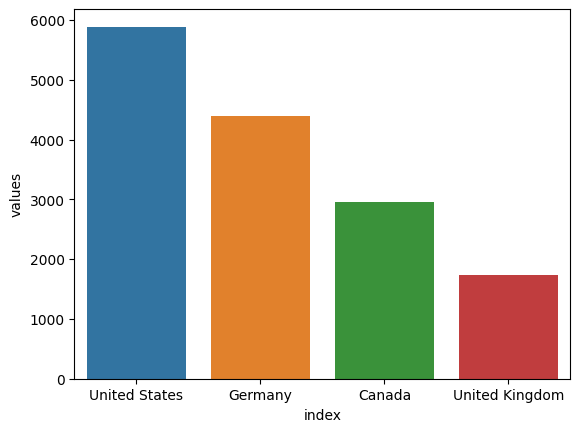

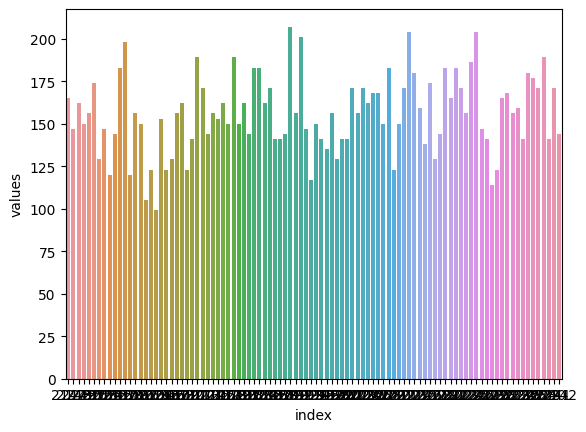

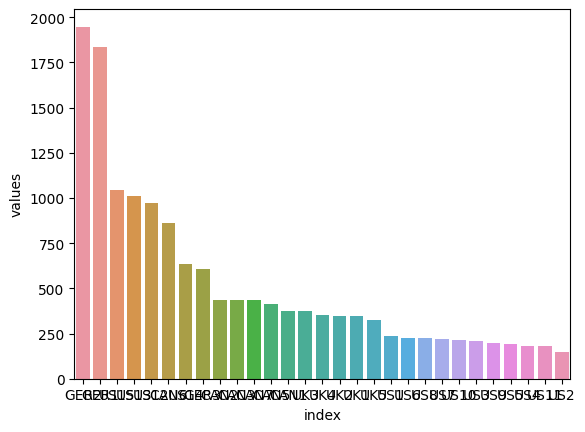

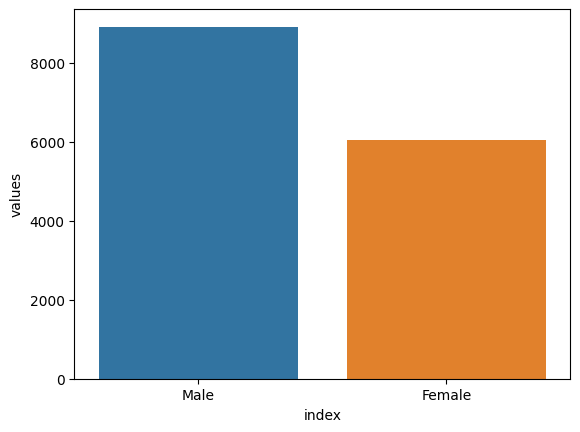

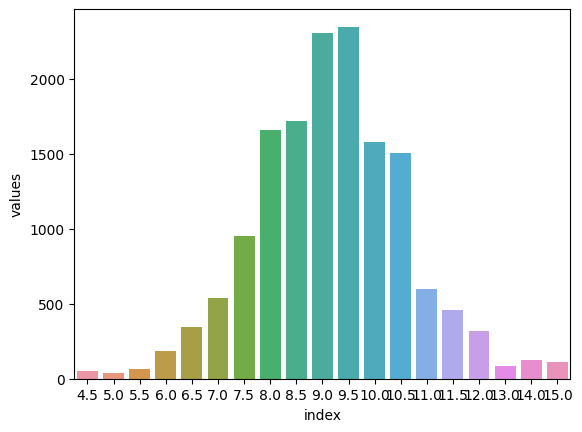

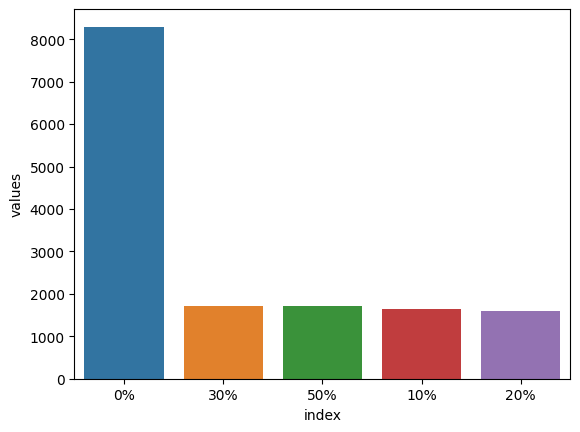

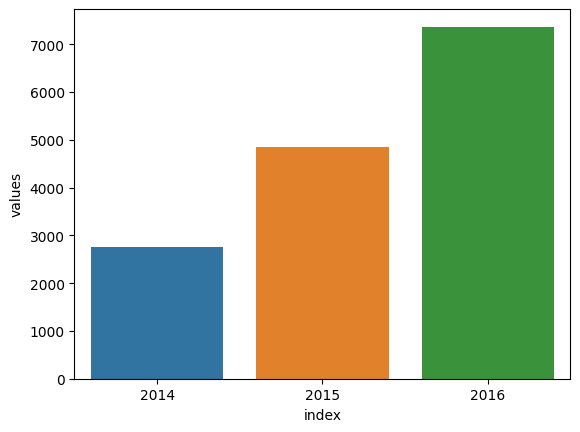

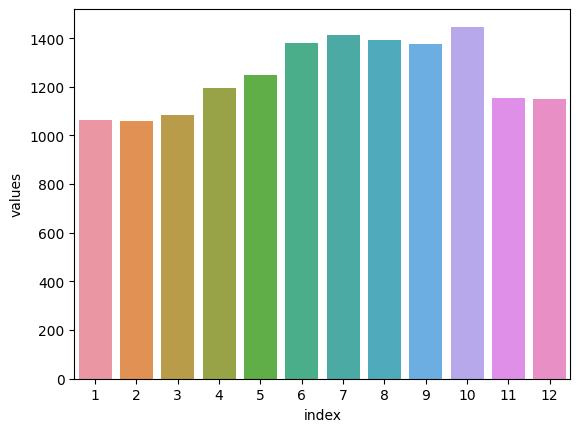

In [22]:
for cat_variable in categorical_variables:
    frequency = dataShoes[cat_variable].value_counts()
    df_frequency = pd.DataFrame({'index': frequency.index.tolist(), 'values': frequency.tolist()})
    sns.barplot(x='index', y='values', data=df_frequency)
    plt.show()

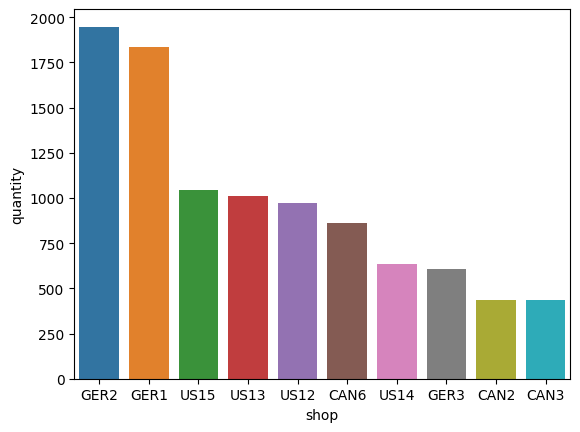

In [23]:
frecuency_shops = dataShoes['Shop'].value_counts().head(10)
df_frecuency_shops = pd.DataFrame({'shop': frecuency_shops.index.tolist(), 'quantity':frecuency_shops.tolist()})
sns.barplot(x='shop', y='quantity', data=df_frecuency_shops)
plt.show()

##Variables numéricas
Vamos a realizar un recorrido de nuestras variables numéricas, con la función histplot() de seaborn creamos un histograma que sirve para dibujar las variables numéricas representadas en intervalos.

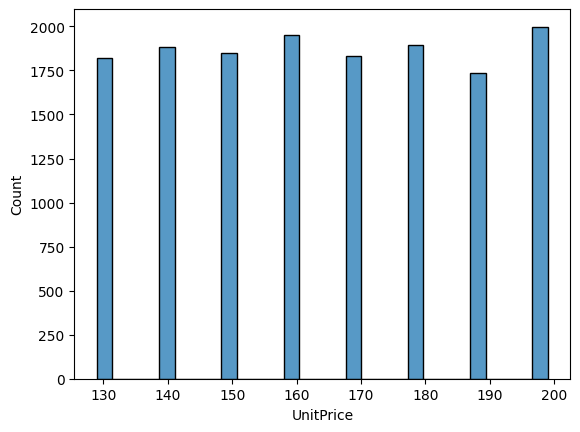

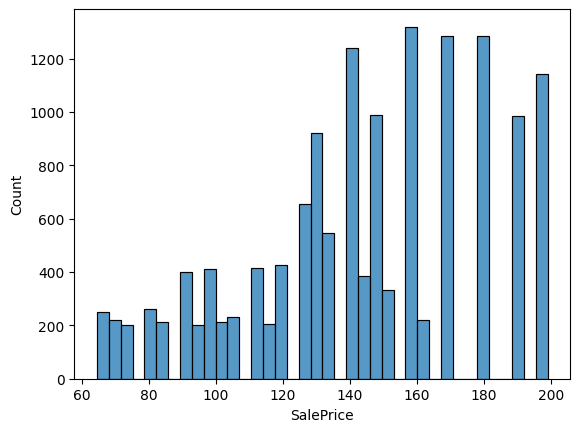

In [24]:
for num_variable in numerical_variables:
    sns.histplot(dataShoes[num_variable], bins='auto')
    plt.show()

##Corelación entre variables

<ipython-input-25-8c84d5a3e03d>:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  corr = dataShoes.corr()


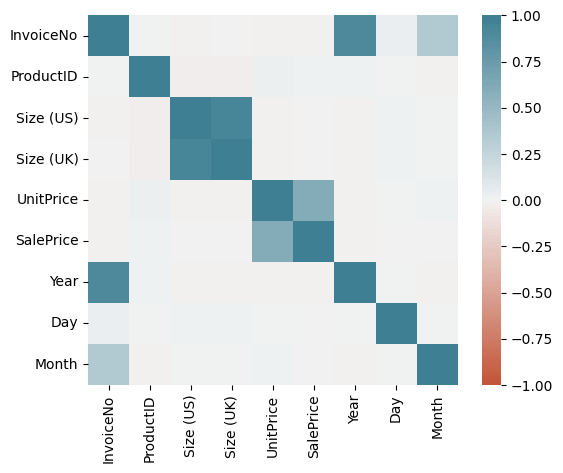

In [25]:
corr = dataShoes.corr()
sns.heatmap(corr, vmin=-1, vmax=1, center=0,cmap=sns.diverging_palette(20, 220, n=200),square=True)
plt.show()

##**Primeras conclusiones**

Analizados nuestros datos hemos percibido que Estados Unidos es el principal mercado, los hombres son un mercado mayor que el de las mujeres y que los dos últimos años conforman la mayoría de las ventas.

##**Solución**

Para resolver el problema, que es, poder calcular la cantidad máxima de zapatillas que se venderán en base a nuestras ventas que se han realizado los años anteriores.

Utilizaremos los datos del año 2015 y 2016, las ventas realizadas a los hombres y al país de Estados Unidos. Agruparemos basándonos en la talla que es Size (US), en base al año y al mes. Con la función size() realizaremos el conteo de nuestros datos para obtener la cantidad de tallas vendidas, con la función unstack(level=0) podremos utilizar Size (US) como nuestras columnas y con fillna(value=0) el cual, llenara los valores Nan con el valor 0

In [26]:
grouped = dataShoes[(dataShoes['Year'] != 2014) & (dataShoes['Gender'] == 'Male')
             & (dataShoes['Country'] == 'United States')].groupby(
             ['Size (US)', 'Year', 'Month']).size()\
             .unstack(level=0).fillna(value=0)

In [27]:
grouped

Size (US)   6.0   6.5   7.0   7.5   8.0   8.5   9.0   9.5   10.0  10.5  11.0  \
Year Month                                                                     
2015 1       0.0   4.0   0.0   0.0   5.0   4.0  10.0  18.0   8.0   7.0   5.0   
     2       0.0   1.0   0.0   1.0   3.0   5.0  14.0  16.0  13.0  13.0   5.0   
     3       0.0   0.0   0.0   2.0   1.0   3.0   7.0  23.0  13.0   8.0   4.0   
     4       0.0   1.0   0.0   1.0   0.0   1.0   9.0  15.0  15.0   8.0   7.0   
     5       3.0   0.0   1.0   0.0   6.0   2.0  17.0  16.0   7.0  15.0   5.0   
     6       1.0   0.0   2.0   0.0   6.0  11.0  16.0  16.0  20.0  10.0   5.0   
     7       1.0   2.0   1.0   3.0   4.0   6.0  20.0  19.0  22.0  16.0   4.0   
     8       3.0   3.0   0.0   2.0   0.0   6.0  21.0  26.0  18.0   8.0   6.0   
     9       5.0   0.0   1.0   3.0   5.0   4.0  13.0  25.0  22.0  16.0   3.0   
     10      4.0   1.0   2.0   2.0   6.0  12.0  17.0  17.0  15.0  16.0   5.0   
     11      0.0   3.0   2.0   2.0   3.0   4.0  10.0  35.0  11.0  17.0   5.0   
     12      0.0   3.0   3.0   2.0   3.0   2.0  12.0  24.0  14.0  14.0  10.0   
2016 1       4.0   3.0   0.0   3.0   7.0  12.0  17.0  19.0  17.0  13.0   5.0   
     2       1.0   2.0   0.0   2.0   9.0  12.0  13.0  25.0  26.0  16.0  16.0   
     3       3.0   0.0   1.0   3.0   7.0   8.0  13.0  27.0  26.0  22.0  13.0   
     4       1.0   1.0   0.0   1.0   3.0   8.0  11.0  24.0  19.0  14.0  10.0   
     5       3.0   0.0   6.0   7.0  12.0  15.0  21.0  26.0  16.0  28.0  10.0   
     6       3.0   0.0   4.0   0.0   2.0   9.0  22.0  33.0  31.0  19.0  11.0   
     7       3.0   1.0   4.0   7.0   9.0  17.0  25.0  25.0  25.0  18.0  15.0   
     8       4.0   7.0   2.0   3.0   4.0  17.0  30.0  47.0  24.0  15.0   8.0   
     9       3.0   2.0   3.0   4.0   7.0   6.0  26.0  31.0  23.0  19.0   9.0   
     10      7.0   1.0   0.0   6.0   5.0   9.0  25.0  44.0  31.0  21.0   7.0   
     11      3.0   2.0   0.0   1.0   2.0  10.0  13.0  37.0  15.0  16.0   6.0   
     12      0.0   1.0   0.0   1.0   6.0   6.0  10.0  26.0  20.0  10.0   7.0   

Size (US)   11.5  12.0  13.0  14.0  15.0  
Year Month                                
2015 1       3.0   1.0   0.0   1.0   0.0  
     2       3.0   0.0   0.0   2.0   0.0  
     3       2.0   0.0   1.0   1.0   0.0  
     4       3.0   3.0   0.0   2.0   0.0  
     5       6.0   1.0   1.0   1.0   1.0  
     6       9.0   4.0   3.0   0.0   0.0  
     7       6.0   1.0   1.0   3.0   0.0  
     8       6.0   2.0   0.0   3.0   1.0  
     9       3.0   4.0   0.0   0.0   1.0  
     10      8.0   3.0   3.0   1.0   0.0  
     11      3.0   6.0   0.0   2.0   1.0  
     12      7.0   3.0   1.0   2.0   1.0  
2016 1       4.0   3.0   1.0   2.0   0.0  
     2       3.0   0.0   1.0   6.0   0.0  
     3       6.0   0.0   2.0   3.0   0.0  
     4       3.0   4.0   0.0   3.0   1.0  
     5       3.0   4.0   3.0   5.0   1.0  
     6       5.0   4.0   2.0   3.0   0.0  
     7       6.0   3.0   1.0   2.0   4.0  
     8       4.0  12.0   0.0   1.0   0.0  
     9       5.0   4.0   0.0   0.0   0.0  
     10     12.0   9.0   4.0   1.0   0.0  
     11     13.0   2.0   3.0   2.0   0.0  
     12      5.0   1.0   2.0   1.0   2.0

Para poder resolver este problema haremos uso de intervalos de confianza, usar estos intervalos nos permitirá calcular los valores mínimos y máximos basados en nuestros datos. Utilizar un nivel de confianza del 95% es recomendado, empecemos.

Con la siguiente fórmula podemos calcular el intervalo de confianza.

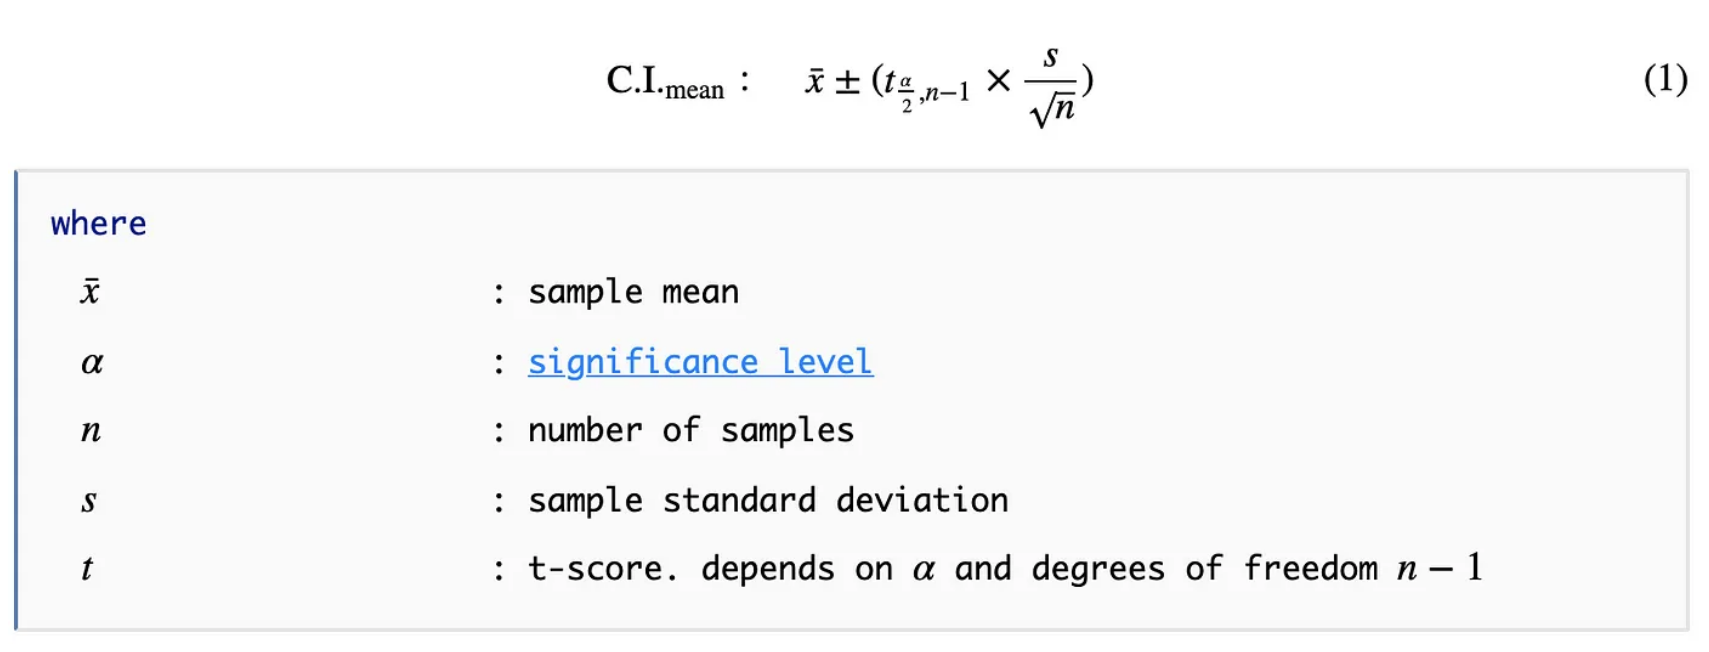

Primero haremos el cálculo de la media o promedio y el error estándar, el error estándar es igual a la desviación estándar de la muestra dividida por la raíz cuadrada de la cantidad de nuestros datos.

Haremos el cálculo por talla de zapatilla que tenemos.

In [ ]:
means = []
standard_errors = []
for column in grouped.columns:
    means.append(grouped[column].mean())
    #sem función de pandas para calcular el error estandar
    standard_errors.append(grouped[column].sem())

#Creamos un diccionario y luego lo cargamos en un dataframe de pandas
d = {'means': means, 'std_error': standard_errors}
df_calculations = pd.DataFrame(data=d, index=grouped.columns)

In [ ]:
df_calculations

,means,std_error
Size (US),,
6.0,2.166667,0.393179
6.5,1.583333,0.340059
7.0,1.333333,0.338725
7.5,2.333333,0.411196
8.0,4.791667,0.598849
8.5,7.875000,0.944689
9.0,16.333333,1.262139
9.5,25.583333,1.766144
10.0,18.791667,1.325583


Hacemos el cálculo del margen de error que es multiplicar [t-score](https://www.tdistributiontable.com/) por el error estándar. Para calcular t-score de alpha medios, utilizamos un nivel de confianza de 95% y la cantidad de datos de n-1, n vendría a ser 24 debido a que estamos calculando por dos años. El valor resaltado podríamos tomarlo como 2.07

In [ ]:
df_calculations['error_margin'] = df_calculations['std_error'].apply(lambda x: x * 2.07)
df_calculations

,means,std_error,error_margin
Size (US),,,
6.0,2.166667,0.393179,0.813880
6.5,1.583333,0.340059,0.703922
7.0,1.333333,0.338725,0.701160
7.5,2.333333,0.411196,0.851176
8.0,4.791667,0.598849,1.239618
8.5,7.875000,0.944689,1.955505
9.0,16.333333,1.262139,2.612628
9.5,25.583333,1.766144,3.655917
10.0,18.791667,1.325583,2.743957


Sumamos y restamos a la media para calcular el intervalo de confianza y redondeamos hacia arriva para obtener la máxima cantidad de zapatillas para un nivel de confianza al 95% basados en los años 2015 y 2016. La columna math_round_up representa este valor.



In [ ]:
df_calculations['error_margin'] = df_calculations['std_error'].apply(lambda x: x * 2.07)
df_calculations['low_margin'] = df_calculations.apply(lambda x: x['means'] - x['error_margin'], axis=1)
df_calculations['up_margin'] = df_calculations.apply(lambda x: x['means'] + x['error_margin'], axis=1)
df_calculations['math_round_up'] = df_calculations.apply(lambda x: math.ceil(x['up_margin']), axis=1)
df_calculations

,means,std_error,error_margin,low_margin,up_margin,math_round_up
Size (US),,,,,,
6.0,2.166667,0.393179,0.813880,1.352787,2.980546,3
6.5,1.583333,0.340059,0.703922,0.879411,2.287255,3
7.0,1.333333,0.338725,0.701160,0.632174,2.034493,3
7.5,2.333333,0.411196,0.851176,1.482158,3.184509,4
8.0,4.791667,0.598849,1.239618,3.552049,6.031284,7
8.5,7.875000,0.944689,1.955505,5.919495,9.830505,10
9.0,16.333333,1.262139,2.612628,13.720705,18.945961,19
9.5,25.583333,1.766144,3.655917,21.927416,29.239251,30
10.0,18.791667,1.325583,2.743957,16.047709,21.535624,22


###**Grafica para ver las cantidades**

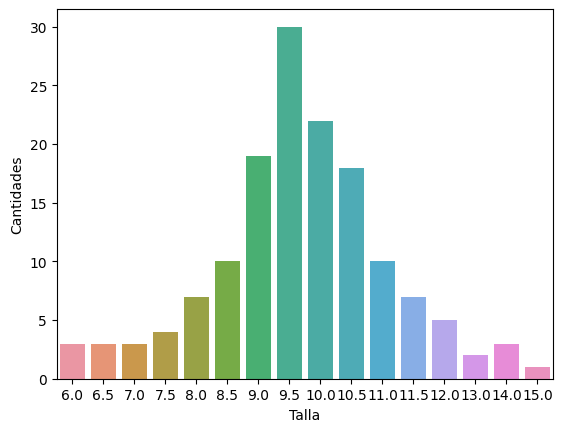

In [ ]:
frequency = df_calculations['math_round_up']
df_frequency = pd.DataFrame({'Talla': frequency.index.tolist(), 'Cantidades': frequency.tolist()})
sns.barplot(x='Talla', y='Cantidades', data=df_frequency)
plt.show()